In [1]:
#IMPORTING LIBRARIES FOR DATA MANIPULATION
#IMPORTING LIBRARIES FOR DATA VISUALIZATION
import pandas as pd
import os
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from itertools import combinations
from collections import Counter

# <span style="color:green">(Feedback / Comments Welcome)! </span>

# <span style="color:purple">DOWNLOADING THE DATA</span>

In [2]:
# 12 MONTHS OF SALES CSV
for i in os.listdir('../input/sales-product-data'):
    print(i)

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


In [3]:
# MERGING 12 MONTHS OF SALES INTO THE FOLDER
files = [file for file in os.listdir('../input/sales-product-data')] 

# PANDA DATAFRAME
all_months_data = pd.DataFrame()

# LOOP FOR CONCAT THE DATA
for file in files:
    data = pd.read_csv("../input/sales-product-data/" + file)
    all_months_data = pd.concat([all_months_data, data])
 
# EXPORTING ALL DATA TO CSV
all_months_data.to_csv("all_data.csv", index=False)

In [4]:
# READ THE CSV FILE
sales_data = pd.read_csv('all_data.csv') 
sales_data 

# CREATING A COPY OF DATAFRAME
df_original_file = sales_data.copy()

In [5]:
# SUMMARY OF THE DATAFRAME
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
# CHECIKING THE FIRST 5 ROWS OF DATA
sales_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [7]:
 # CHECIKING THE LAST 5 ROWS OF DATA
sales_data.tail() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [8]:
# CHECKING FOR NULL VALUES
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
sales_data[sales_data.isna().any(axis='columns')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# PERCENTAGE OF NULL VALUES
percent_missing = (sales_data.isnull().sum() / len(sales_data) * 100).round(2)
df_missing = pd.DataFrame({'% of Missing Values' :percent_missing})
df_missing

,% of Missing Values
Order ID,0.29
Product,0.29
Quantity Ordered,0.29
Price Each,0.29
Order Date,0.29
Purchase Address,0.29


  **29% OF THE DATA IS MISSING.**

# <span style="color:purple">CLEANING THE DATA</span>

In [11]:
# DROPPING THE ROWS OF NAN DATA 
sales_data = sales_data.dropna(how='all')

In [12]:
# CHECKING FOR NULL VALUES
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
#CHECKING FOR NULL VALUES
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
# CHECKING FOR UNIQUE VALUES
sales_data['Quantity Ordered'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [15]:
# CREATING FILTER TO DROP TEXT VALUES
filter_text = sales_data['Quantity Ordered'] != 'Quantity Ordered'

# REPLACING DATA WITHOUT TEXT VALUES 
sales_data = sales_data[filter_text]

In [16]:
# CONVERTING 'QUANTITY ORDERED' AND 'PRICE EACH' COLUMN TO NUMERIC INTEGER
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int64')
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [17]:
# CONVERTING 'ORDER DATE' TO DATETIME
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [18]:
# CONFIRMING DATA TYPE CHANGE
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


#  <span style="color:purple">DATA PREPARATION</span>

In [19]:
# ADDING Month, Hour, Minute, Sales, Cities COLUMN
# ADDING City COLUMN IN THE DATA
def get_city(address):
    return address.split(',')[1]
# ADDING State COLUMN IN THE DATA
def get_state(address):
    return address.split(',')[2].split(' ')[1]
def augment_data(data):
    # ADDING THE YEAR COLUMN
    data['Year'] = data['Order Date'].dt.year
    
    # ADDING THE Month COLUMN
    data['Month'] = data['Order Date'].dt.month
    
    # ADDING THE Hour COLUMN
    data['Hour'] = data['Order Date'].dt.hour 
    
    # ADDING THE Minute COLUMN
    data['Minute'] = data['Order Date'].dt.minute 
    
    # ADDING SALE COLUMN (QUANTITY ORDERED * PRICE EACH)
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # ADDING Cities COLUMN
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data

In [20]:
# CONFIRMING COLUMNS WAS ADDED
sales_data = augment_data(sales_data)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)


#  <span style="color:purple">DATA ANALYSIS</span>

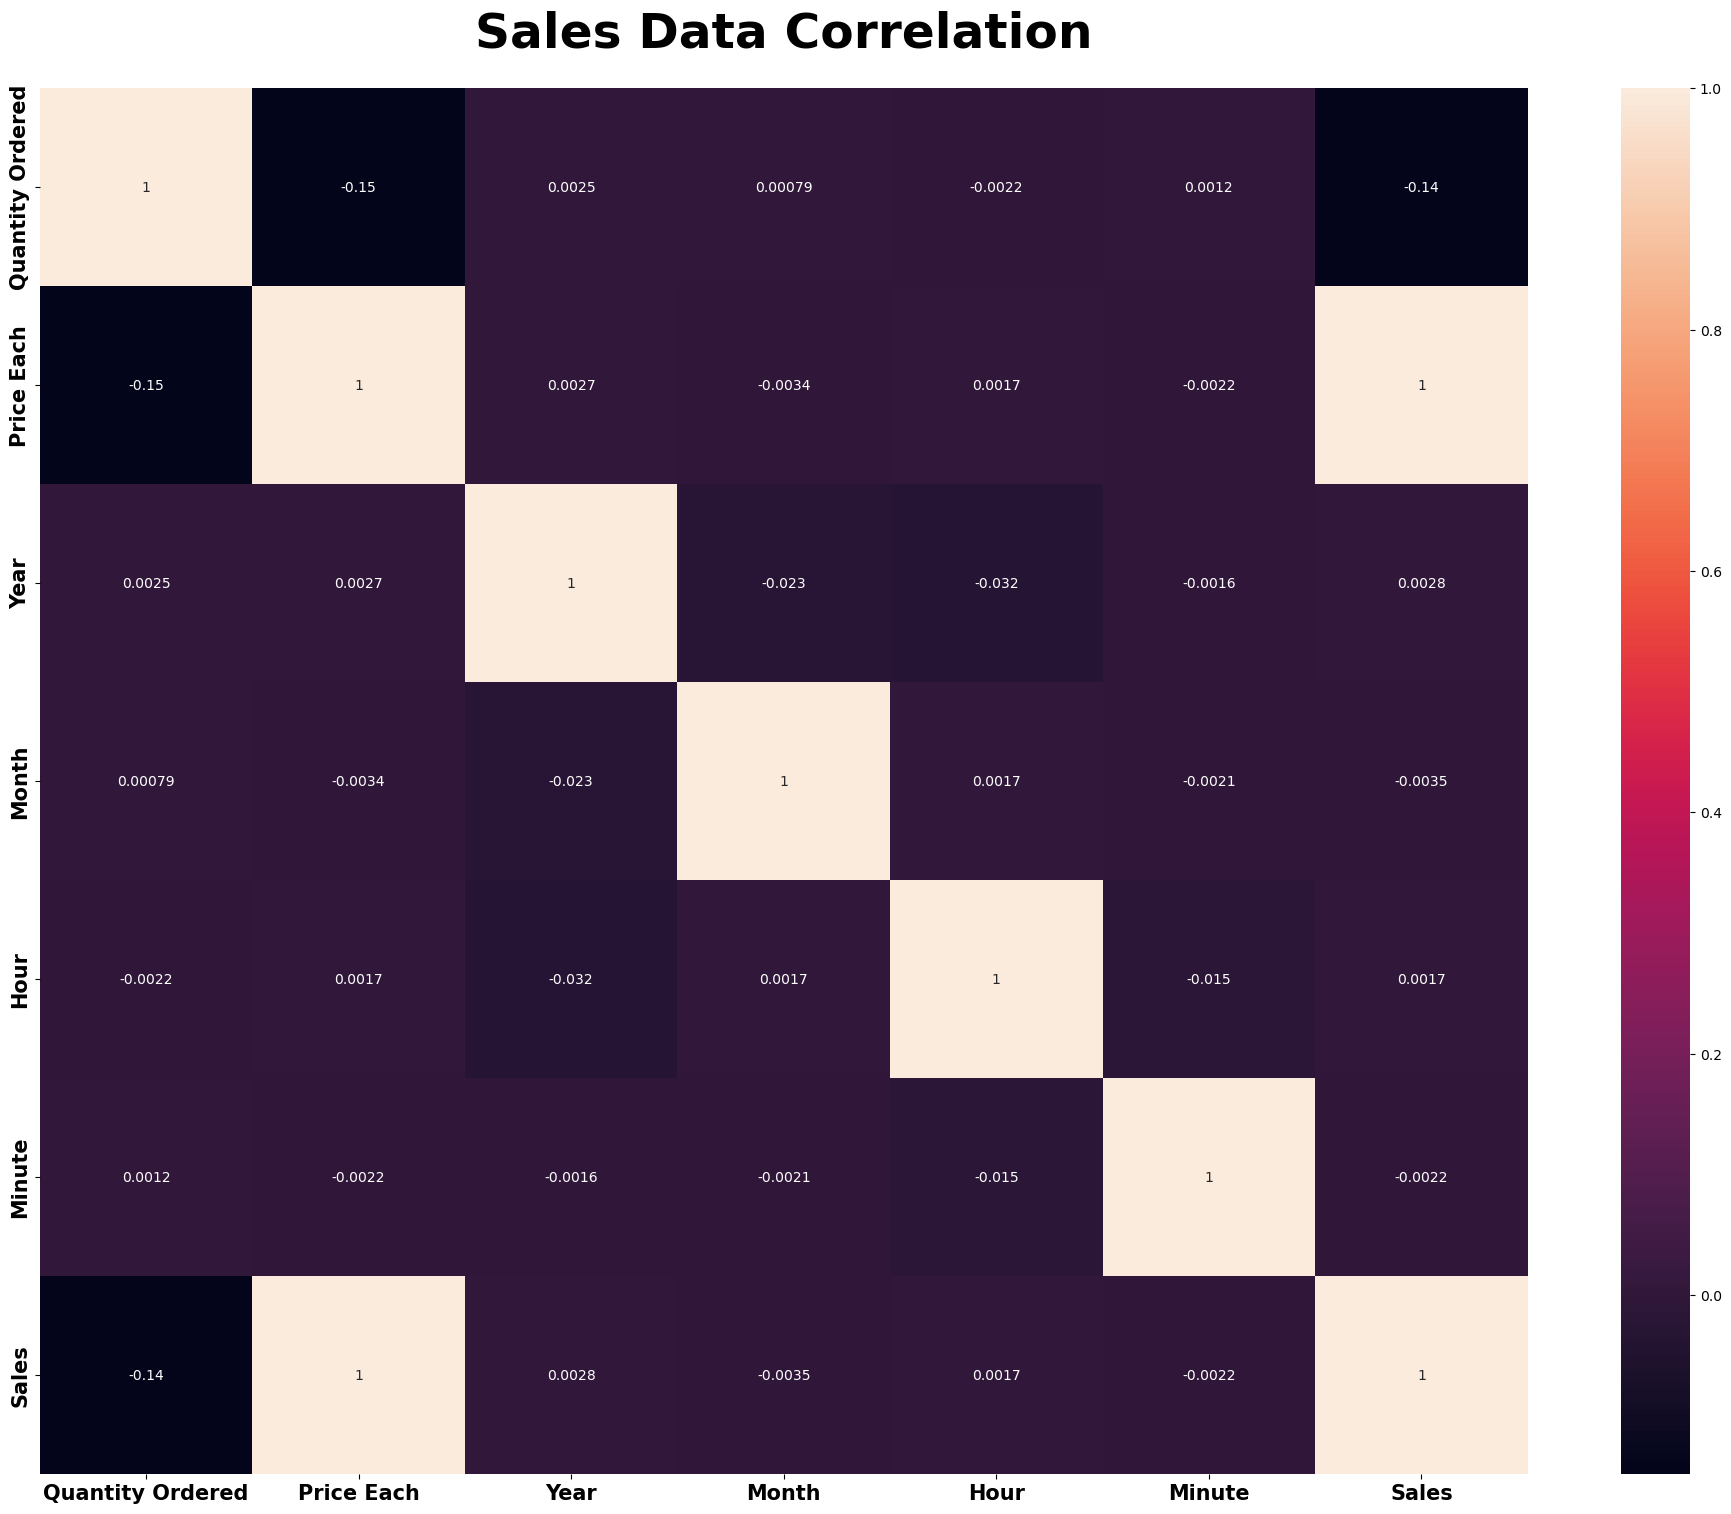

In [21]:
# SALES DATA CORRELATION
# CREATING HEATMAP 
plt.figure(figsize=(24, 18))
sns.heatmap(sales_data.corr(), annot=True)

# CUSTOMIZING THE TITTLE AND AXIS LABELS
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15)

# SALES DATA CORRELATION PLOT
plt.show()

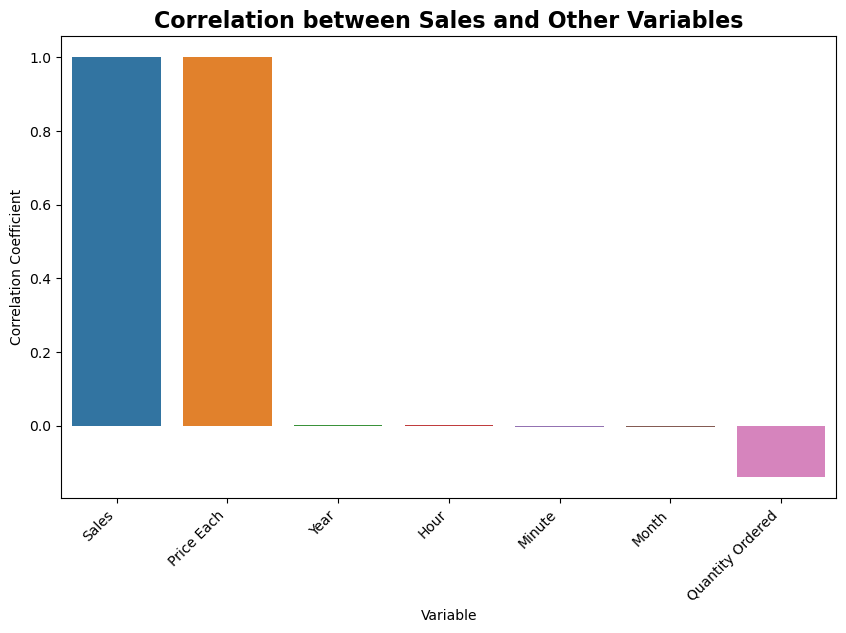

In [22]:
# CALCULATING CORRELATION COEFFICIENTS/SORTING IN DESCENDING
corr_data = sales_data.corr()['Sales'].sort_values(ascending=False)

# BAR CHART 
plt.figure(figsize=(10,6))
sns.barplot(x=corr_data.index, y=corr_data.values)
plt.title("Correlation between Sales and Other Variables", fontsize=16, fontweight='bold')
plt.xlabel("Variable")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# STATISTICAL MEASURE OF SALES DATA WITHOUT OBJECT TYPE OF DATA
sales_data_numeric = sales_data.describe(include=[np.number]) 
"Statistical Measure of Sales Data in Numeric Data"
sales_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [24]:
# STATISTICAL MEASURE OF SALE DATA WITHOUT OBJECT TYPE OF DATA
sales_data_object = sales_data.describe(exclude=[np.number], datetime_is_numeric=True)
"Statistical Measure of Sales Data in Object / Str Data"
sales_data_object

,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,NaN,140787,10
top,160873,USB-C Charging Cable,NaN,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,5,21903,NaN,9,44732
mean,NaN,NaN,2019-07-18 21:54:38.887550464,NaN,NaN
min,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
25%,NaN,NaN,2019-04-16 21:05:15,NaN,NaN
50%,NaN,NaN,2019-07-17 20:40:30,NaN,NaN
75%,NaN,NaN,2019-10-26 08:14:00,NaN,NaN
max,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


<AxesSubplot:>

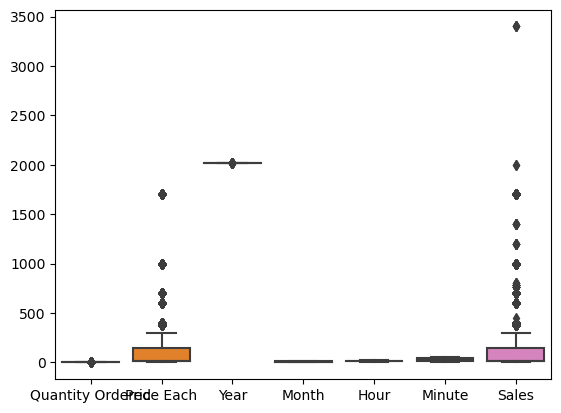

In [25]:
# CREATING A BOX PLOT
num_cols = sales_data.select_dtypes(include=[np.number])
sns.boxplot(data=num_cols)

#  <span style="color:blue">WHAT IS THE TOTAL NUMBER OF SALES?</span>

In [26]:
# CALCULATING TOTAL NUMBER OF SALES
total_sales = sales_data['Quantity Ordered'].sum()
print(f"Total number of sales: {total_sales}")

Total number of sales: 209079


**Total number of sales: 209079**

# <span style="color:blue"> WHAT IS THE AVERAGE SALE BY MONTH?</span>

In [27]:
# CALCULATE REVENUE
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# CALCULATE AVERAGE SALES BY MONTH
avg_month_sales = sales_data.groupby('Month').agg({'Revenue': 'mean'})

# CONFIRMING RESULTS
print('Average Sales by Month (Millions):\n', avg_month_sales)

Average Sales by Month (Millions):
           Revenue
Month            
1      187.687376
2      183.884962
3      185.250471
4      185.495390
5      190.305852
6      190.187565
7      185.249826
8      187.648849
9      180.497387
10     184.238580
11     182.074956
12     184.655913


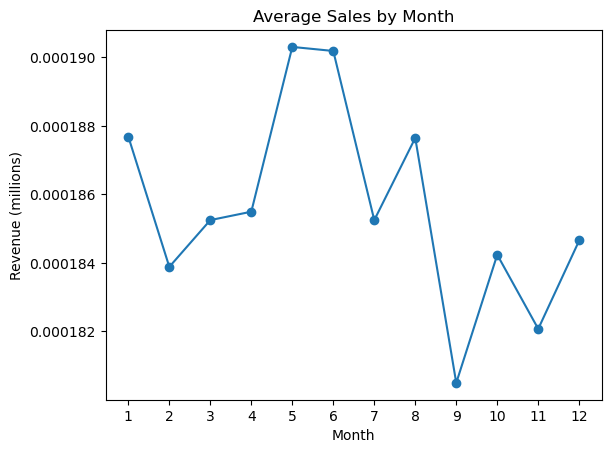

In [28]:
# CALCULATE AVERAGE SALES BY MONTH
avg_month_sales = sales_data.groupby('Month').agg({'Revenue': 'mean'})

# CONVERT REVENUE TO MILLIONS
avg_month_sales['Revenue'] = avg_month_sales['Revenue'] / 1000000

# LINE CHART
plt.plot(avg_month_sales.index, avg_month_sales['Revenue'], marker='o')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Revenue (millions)')
plt.xticks(avg_month_sales.index)
plt.show()

#  <span style="color:blue">WHAT IS THE MONTHLY REVENUE?</span>

In [29]:
# CALCULATING MONTHLY REVENUE
monthly_revenue = sales_data.groupby('Month').sum()['Revenue']
print('Monthly Revenue')
print(monthly_revenue)

Monthly Revenue
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Revenue, dtype: float64


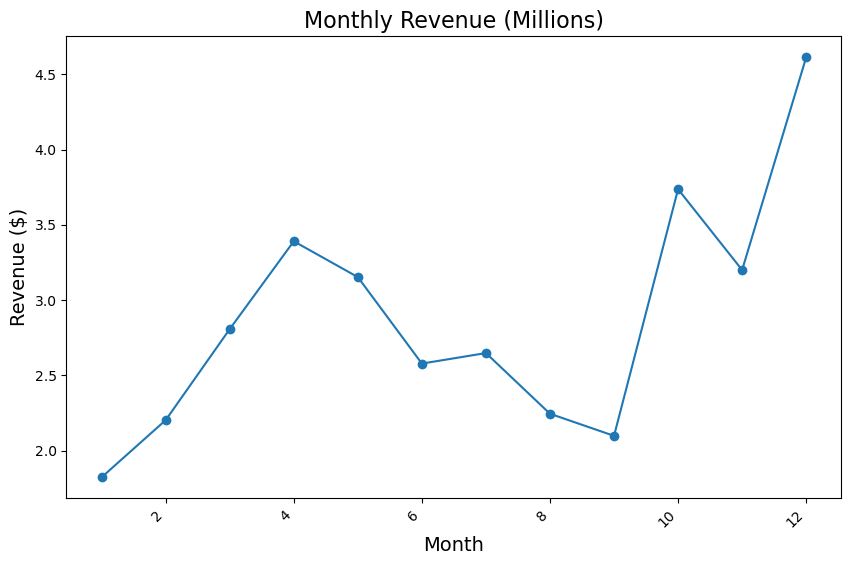

In [30]:
# LINE PLOT FOR MONTHLY REVENUE
monthly_revenue = sales_data.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(10,6))

# CONVERT REVENUE TO MILLIONS
plt.plot(monthly_revenue.index, monthly_revenue.values / 1000000, marker='o')
plt.title('Monthly Revenue (Millions)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

#  <span style="color:blue">WHAT ARE THE KEY DEMOGRAPHICS OF THE CUSTOMERS?</span>

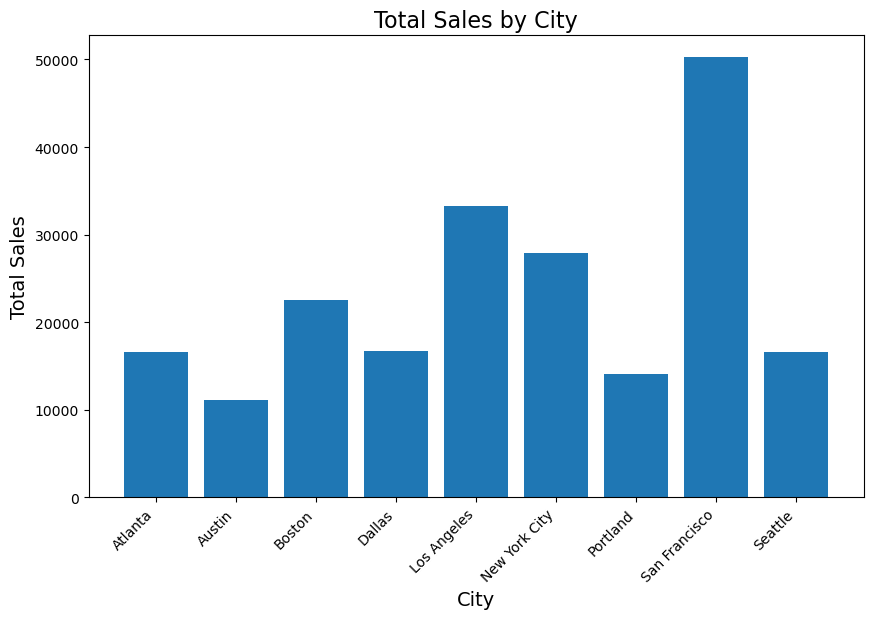

In [31]:
# SEPARATE ADDRESS INTO STREET, CITY, STATE, AND ZIP CODE
address_df = sales_data['Purchase Address'].str.split(', ', expand=True)
address_df.columns = ['street', 'city', 'state_zip']
address_df[['state', 'zip_code']] = address_df['state_zip'].str.split(' ', expand=True)
totalsales = pd.concat([sales_data, address_df], axis=1)

# TOTAL SALES BY CITY
sales_by_city = totalsales.groupby('city').sum()['Quantity Ordered']

# BAR CHART
plt.figure(figsize=(10,6))
plt.bar(sales_by_city.index, sales_by_city.values)
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
# TOTAL SALES BY STATE
# CHOROPLETH MAP TO SHOW SALES BY STATE
address_df = sales_data['Purchase Address'].str.split(', ', expand=True)
address_df.columns = ['street', 'city', 'state_zip']
address_df[['state', 'zip_code']] = address_df['state_zip'].str.split(' ', expand=True)
totalsales = pd.concat([sales_data, address_df], axis=1)
sales_by_state = totalsales.groupby('state').sum()['Quantity Ordered']
sales_by_state_df = pd.DataFrame({'state': sales_by_state.index, 'total_sales': sales_by_state.values})
fig = px.choropleth(sales_by_state_df, locations='state', locationmode="USA-states", scope="usa", color='total_sales', title='Total Sales by State')
fig.show()

#  <span style="color:blue">WHICH PRODUCTS SELL BEST?</span> 

In [33]:
# TOTAL QUANTITY OF EACH PRODUCT ORDERED
product_sales = sales_data.groupby('Product').sum()['Quantity Ordered']

# TOTAL SALES IN DESCENDING ORDER
top_selling_products = product_sales.sort_values(ascending=False)

# TOP 10 BEST SELLING PRODUCTS
print(top_selling_products.head(10))

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


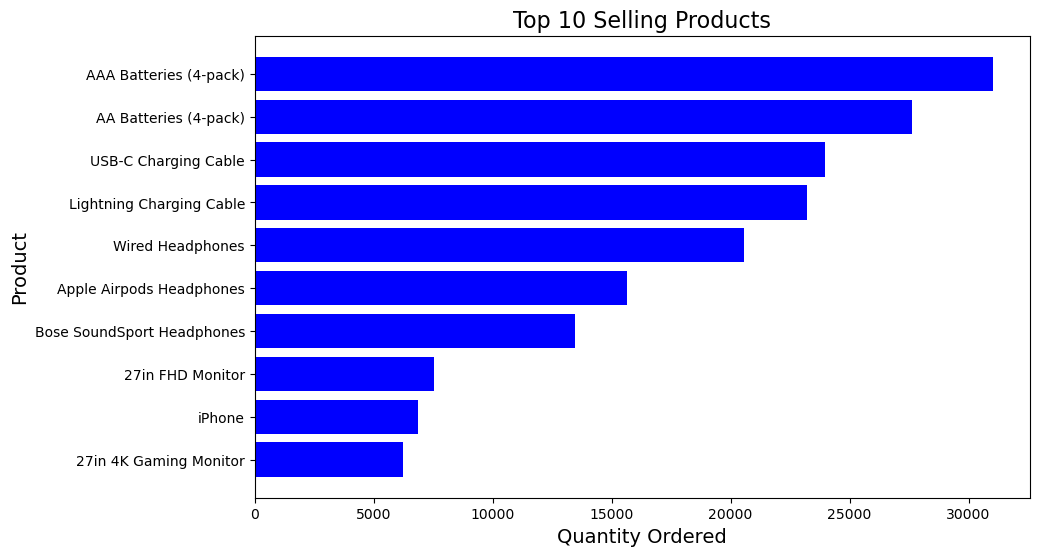

In [34]:
# TOTAL QUANTITY OF EACH PRODUCT ORDERED
product_sales = sales_data.groupby('Product').sum()['Quantity Ordered']

# TOTAL SALES IN DESCENDING ORDER
top_selling_products = product_sales.sort_values(ascending=False)[:10]

# HORIZONTAL BAR CHART OF TOP 10 SELLING PRODUCTS
plt.figure(figsize=(10,6))
plt.barh(top_selling_products.index, top_selling_products.values, color='blue')
plt.title('Top 10 Selling Products', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

#  <span style="color:blue">TOTAL QUANTITY ORDERED BY PRODUCT</span> 

In [35]:
# TOTAL QUANTITY ORDERED BY PRODUCT
product_sales = sales_data.groupby('Product').sum()['Quantity Ordered']

# TOTAL QUANTITY IN DESCENDING ORDER
top_selling_products = product_sales.sort_values(ascending=False)

# FUNNEL CHART
fig = go.Figure(go.Funnel(
    y=top_selling_products.index,
    x=top_selling_products.values,
    textposition='auto',
    marker=dict(
        color=top_selling_products.values,
        colorscale='Blues',
        reversescale=True
    ),
    connector=dict(
        line=dict(width=0.5, color='gray'),
    ),
    hovertemplate='Product: %{y}<br>Total Quantity: %{x}<br><extra></extra>'
))
fig.update_layout(
    title='Total Quantity of Each Product Ordered',
    xaxis_title='Total Quantity',
    yaxis_title='Product'
)
fig.show()

#  <span style="color:blue">WHAT WAS THE AVERAGE ORDER VALUE?</span> 

In [36]:
# ADDING TOTAL SALES COLUMN
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# TOTAL SALES FOR EACH ORDER
order_sales = sales_data.groupby('Order ID').sum()['Total Sales']

# AVERAGE ORDER VALUE
avg_order_value = order_sales.mean()

print('The average order value is ${:.2f}'.format(avg_order_value))

The average order value is $193.30


**The average order value is $193.30**

# <span style="color:blue">WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER?</span> 

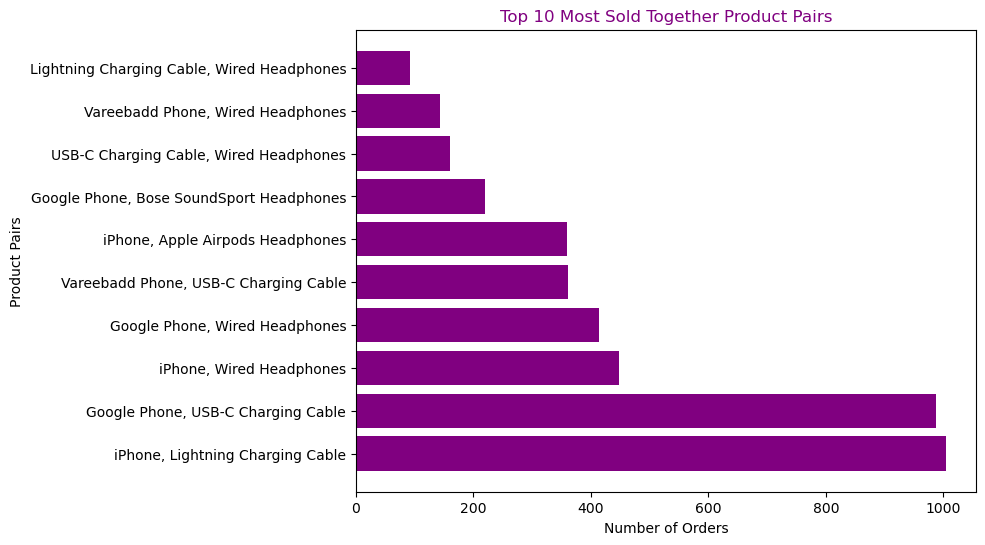

In [37]:
# Create a copy of the slice of sales_data
data = sales_data[sales_data['Order ID'].duplicated(keep=False)].copy()

# Create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Create a new DataFrame with unique Order IDs and grouped products
data = data[['Order ID', 'Grouped']].drop_duplicates()

# Create a Counter object to count pairs of products
count = Counter()

# Count the pairs of products
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Create a bar chart of the top 10 most commonly sold together products
top_items = count.most_common(10)
item_pairs = [', '.join(pair) for pair, count in top_items]
item_counts = [count for pair, count in top_items]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(item_pairs, item_counts, color='purple')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Product Pairs')
ax.set_title('Top 10 Most Sold Together Product Pairs', color='purple')

plt.show()

